In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [19]:
traindata = pd.read_csv("C:/Users/rakes/jupyter/titanic/train.csv")
testdata = pd.read_csv("C:/Users/rakes/jupyter/titanic/test.csv")
combinedata = [traindata, testdata]

In [20]:
combinedata

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [21]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
traindata.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
testdata.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
traindata.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
categoricalparameter = ["Survived", "Pclass", "Sex", "Embarked"]

print("count of each categorical parameter")
print(traindata[categoricalparameter].count())
print("count of each categorical parameter")
for x in categoricalparameter:
    print(" Unique values in " + x)
    print(traindata[x].unique())
    print(" Most frequent values in " + x)
    print(traindata[x].mode().values)
    print(" frequent is " + x)
    print(traindata[x].value_counts().max())

count of each categorical parameter
Survived    891
Pclass      891
Sex         891
Embarked    889
dtype: int64
count of each categorical parameter
 Unique values in Survived
[0 1]
 Most frequent values in Survived
[0]
 frequent is Survived
549
 Unique values in Pclass
[3 1 2]
 Most frequent values in Pclass
[3]
 frequent is Pclass
491
 Unique values in Sex
['male' 'female']
 Most frequent values in Sex
['male']
 frequent is Sex
577
 Unique values in Embarked
['S' 'C' 'Q' nan]
 Most frequent values in Embarked
['S']
 frequent is Embarked
644


correlation for Pclass = 1 and survived
0.6296296296296297
 Female survival percentage 
68.12865497076024


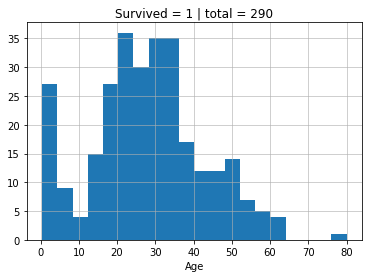

In [26]:
print("correlation for Pclass = 1 and survived")
Pclass1Survived = traindata[(traindata.Pclass == 1) & (traindata.Survived == 1)]
Pclass1data = traindata[(traindata.Pclass == 1)]
print(Pclass1Survived["Pclass"].count() / Pclass1data["Pclass"].count())

femalesurvival = traindata[(traindata.Sex == "female") & (traindata.Survived == 1)]
totalsurvival = traindata[(traindata.Survived == 1)]
femaleSurvivalPercentage = (femalesurvival["Survived"].count() / totalsurvival["Survived"].count()) * 100
print(" Female survival percentage ")
print(femaleSurvivalPercentage)

agesurvivaldata = traindata[(traindata.Survived == 1)]

plt.hist(agesurvivaldata["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 1 | total = " + str(agesurvivaldata["Age"].count()))
plt.grid(axis="x", alpha=0.75)
plt.grid(axis="y", alpha=0.75)
plt.show()

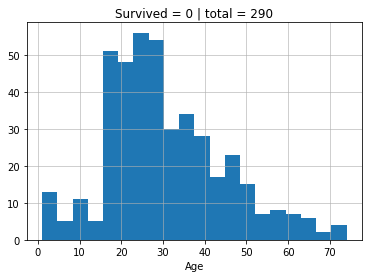

In [27]:
agedeathdata = traindata[(traindata.Survived == 0)]
agedeathdataset = agedeathdata["Age"].value_counts().keys()
plt.hist(agedeathdata["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 0 | total = " + str(agesurvivaldata["Age"].count()))
plt.grid(axis="x", alpha=0.75)
plt.grid(axis="y", alpha=0.75)
plt.show()

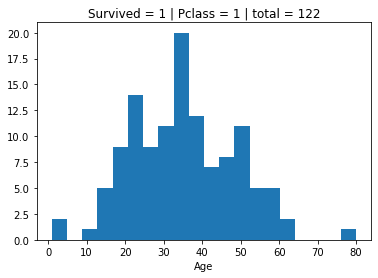

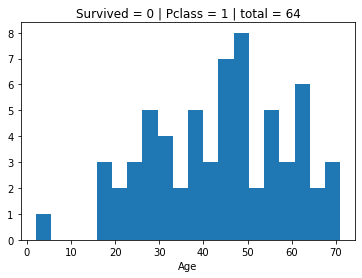

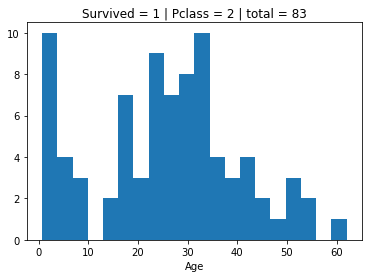

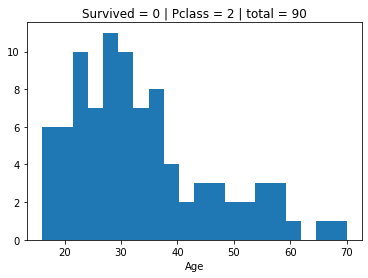

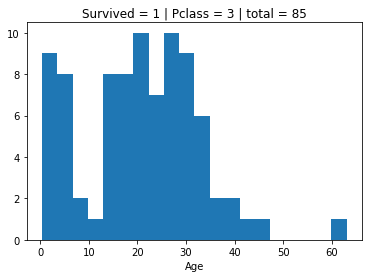

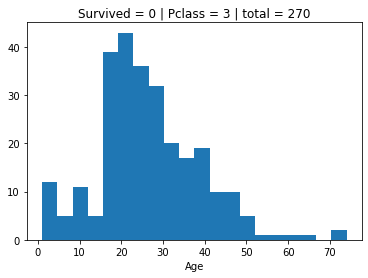

In [28]:
pclass1survival = traindata[(traindata.Survived == 1) & (traindata.Pclass == 1)]
pclass1death = traindata[(traindata.Survived == 0) & (traindata.Pclass == 1)]
pclass2survival = traindata[(traindata.Survived == 1) & (traindata.Pclass == 2)]
pclass2death = traindata[(traindata.Survived == 0) & (traindata.Pclass == 2)]
pclass3survival = traindata[(traindata.Survived == 1) & (traindata.Pclass == 3)]
pclass3death = traindata[(traindata.Survived == 0) & (traindata.Pclass == 3)]

plt.hist(pclass1survival["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 1 | Pclass = 1 | total = " + str(pclass1survival["Age"].count()))
plt.show()

plt.hist(pclass1death["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 0 | Pclass = 1 | total = " + str(pclass1death["Age"].count()))
plt.show()

plt.hist(pclass2survival["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 1 | Pclass = 2 | total = " + str(pclass2survival["Age"].count()))
plt.show()

plt.hist(pclass2death["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 0 | Pclass = 2 | total = " + str(pclass2death["Age"].count()))
plt.show()

plt.hist(pclass3survival["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 1 | Pclass = 3 | total = " + str(pclass3survival["Age"].count()))
plt.show()

plt.hist(pclass3death["Age"], bins=20)
plt.xlabel("Age")
plt.title("Survived = 0 | Pclass = 3 | total = " + str(pclass3death["Age"].count()))
plt.show()

<ipython-input-29-336e6e721e83>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AvgSsurvival = [EmbarkedSsurvival[(traindata.Sex == "female")]["Fare"].mean(),
<ipython-input-29-336e6e721e83>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EmbarkedSsurvival[(traindata.Sex == "male")]["Fare"].mean()]
<ipython-input-29-336e6e721e83>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AvgSdeath = [EmbarkedSdeath[(traindata.Sex == "female")]["Fare"].mean(),
<ipython-input-29-336e6e721e83>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EmbarkedSdeath[(traindata.Sex == "male")]["Fare"].mean()]
<ipython-input-29-336e6e721e83>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  AvgCsurvival = [EmbarkedCsurvival[(traindata.Sex == "female")]["Fare"].mean(),
<ipython-input-29-336e6e721e83>:11: UserWarning: Boolean Series key will be reindexe

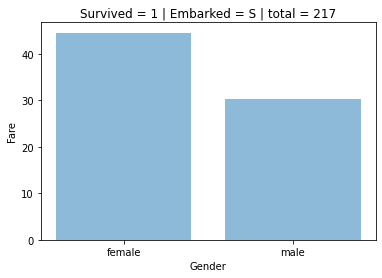

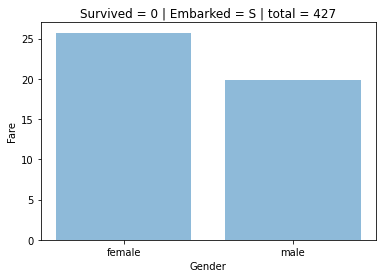

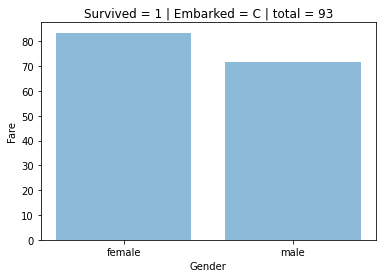

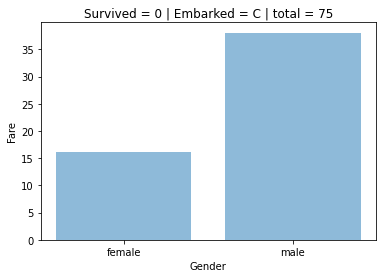

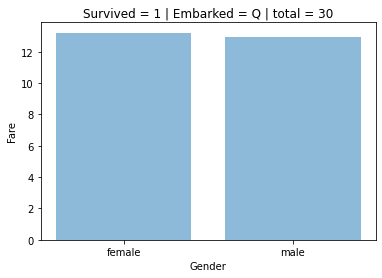

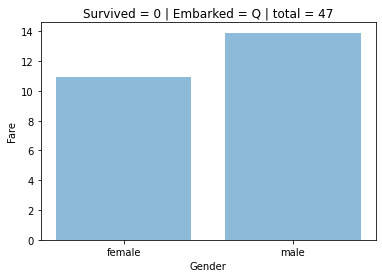

In [29]:
EmbarkedSsurvival = traindata[(traindata.Survived == 1) & (traindata.Embarked == "S")]

AvgSsurvival = [EmbarkedSsurvival[(traindata.Sex == "female")]["Fare"].mean(),
                EmbarkedSsurvival[(traindata.Sex == "male")]["Fare"].mean()]
x = ["female", "male"]
EmbarkedSdeath = traindata[(traindata.Survived == 0) & (traindata.Embarked == "S")]
AvgSdeath = [EmbarkedSdeath[(traindata.Sex == "female")]["Fare"].mean(),
             EmbarkedSdeath[(traindata.Sex == "male")]["Fare"].mean()]
EmbarkedCsurvival = traindata[(traindata.Survived == 1) & (traindata.Embarked == "C")]
AvgCsurvival = [EmbarkedCsurvival[(traindata.Sex == "female")]["Fare"].mean(),
                EmbarkedCsurvival[(traindata.Sex == "male")]["Fare"].mean()]
EmbarkedCdeath = traindata[(traindata.Survived == 0) & (traindata.Embarked == "C")]
AvgCdeath = [EmbarkedCdeath[(traindata.Sex == "female")]["Fare"].mean(),
             EmbarkedCdeath[(traindata.Sex == "male")]["Fare"].mean()]
EmbarkedQsurvival = traindata[(traindata.Survived == 1) & (traindata.Embarked == "Q")]
AvgQsurvival = [EmbarkedQsurvival[(traindata.Sex == "female")]["Fare"].mean(),
                EmbarkedQsurvival[(traindata.Sex == "male")]["Fare"].mean()]
EmbarkedQdeath = traindata[(traindata.Survived == 0) & (traindata.Embarked == "Q")]
AvgQdeath = [EmbarkedQdeath[(traindata.Sex == "female")]["Fare"].mean(),
             EmbarkedQdeath[(traindata.Sex == "male")]["Fare"].mean()]
yheight = np.arange(len(x))
plt.bar(yheight, AvgSsurvival, align="center", alpha=0.5)
plt.xticks(yheight, x)
plt.xlabel("Gender")
plt.ylabel("Fare")
plt.title("Survived = 1 | Embarked = S | total = " + str(EmbarkedSsurvival["Sex"].count()))
plt.show()

plt.bar(yheight, AvgSdeath, align="center", alpha=0.5)
plt.xticks(yheight, x)
plt.xlabel("Gender")
plt.ylabel("Fare")
plt.title("Survived = 0 | Embarked = S | total = " + str(EmbarkedSdeath["Sex"].count()))
plt.show()

plt.bar(yheight, AvgCsurvival, align="center", alpha=0.5)
plt.xticks(yheight, x)
plt.xlabel("Gender")
plt.ylabel("Fare")
plt.title("Survived = 1 | Embarked = C | total = " + str(EmbarkedCsurvival["Sex"].count()))
plt.show()

plt.bar(yheight, AvgCdeath, align="center", alpha=0.5)
plt.xticks(yheight, x)
plt.xlabel("Gender")
plt.ylabel("Fare")
plt.title("Survived = 0 | Embarked = C | total = " + str(EmbarkedCdeath["Sex"].count()))
plt.show()

plt.bar(yheight, AvgQsurvival, align="center", alpha=0.5)
plt.xticks(yheight, x)
plt.xlabel("Gender")
plt.ylabel("Fare")
plt.title("Survived = 1 | Embarked = Q | total = " + str(EmbarkedQsurvival["Sex"].count()))
plt.show()

plt.bar(yheight, AvgQdeath, align="center", alpha=0.5)
plt.xticks(yheight, x)
plt.xlabel("Gender")
plt.ylabel("Fare")
plt.title("Survived = 0 | Embarked = Q | total = " + str(EmbarkedQdeath["Sex"].count()))
plt.show()

In [30]:
rateofduplication = 1 - (len(traindata["Ticket"].drop_duplicates()) / traindata["Ticket"].count())
print("Rate of Duplication in Tickets")
print(rateofduplication)
print("dropping the Ticket Feature")
traindata = traindata.drop(['Ticket'], axis=1)
testdata = testdata.drop(['Ticket'], axis=1)

Rate of Duplication in Tickets
0.23569023569023573
dropping the Ticket Feature


In [31]:
print("null values count for cabin feature in both training and testing datasets")
print(testdata["Cabin"].isna().sum() + traindata["Cabin"].isna().sum())
traindata = traindata.drop(['Cabin'], axis=1)
testdata = testdata.drop(['Cabin'], axis=1)
combinedata = [traindata, testdata]
print(combinedata)

null values count for cabin feature in both training and testing datasets
1014
[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0

In [32]:
trainmean = traindata['Age'].mean()
testmean = testdata['Age'].mean()
traindata['Age'] = traindata['Age'].fillna(trainmean)
testdata['Age'] = testdata['Age'].fillna(testmean)

In [33]:
trainmean

29.69911764705882

In [34]:
combinedata = [traindata, testdata]

In [35]:
combinedata

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex        Age  \
 0                              Braund, Mr. Owen Harris    male  22.000000   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
 2                               Heikkinen, Miss. Laina  female  26.000000   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
 4                             Allen, Mr. William Henry    male  35.000000   
 ..                                                 ...     ..

In [36]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [37]:
traindata = traindata.drop(['PassengerId','Name'],axis = 1)
testdata = testdata.drop(['PassengerId','Name'],axis = 1)

In [38]:
traindata.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
combinedata = [traindata,testdata]

In [40]:
combinedata

[     Survived  Pclass     Sex        Age  SibSp  Parch     Fare Embarked
 0           0       3    male  22.000000      1      0   7.2500        S
 1           1       1  female  38.000000      1      0  71.2833        C
 2           1       3  female  26.000000      0      0   7.9250        S
 3           1       1  female  35.000000      1      0  53.1000        S
 4           0       3    male  35.000000      0      0   8.0500        S
 ..        ...     ...     ...        ...    ...    ...      ...      ...
 886         0       2    male  27.000000      0      0  13.0000        S
 887         1       1  female  19.000000      0      0  30.0000        S
 888         0       3  female  29.699118      1      2  23.4500        S
 889         1       1    male  26.000000      0      0  30.0000        C
 890         0       3    male  32.000000      0      0   7.7500        Q
 
 [891 rows x 8 columns],
      Pclass     Sex       Age  SibSp  Parch      Fare Embarked
 0         3    male 

In [41]:
traindata['Sex']=traindata['Sex'].map({'male':0 , 'female':1})
traindata.rename({'Sex':'Gender'}, axis =1 , inplace = True)
testdata['Sex']=testdata['Sex'].map({'male':0 , 'female':1})
testdata.rename({'Sex':'Gender'}, axis =1 , inplace = True)

In [42]:
combinedata = [traindata,testdata]

In [43]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [44]:
traindata.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [45]:
print("filling Embarked NA values with Mode in train data")
print(traindata['Embarked'].isna().sum())
modevalue = traindata['Embarked'].mode().values
traindata['Embarked'] = traindata['Embarked'].fillna(modevalue[0])
testdata['Embarked'] = testdata['Embarked'].fillna(modevalue[0])
print(traindata['Embarked'].isna().sum())

filling Embarked NA values with Mode in train data
2
0


In [46]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [47]:
print("filling Fare NA values with Mode in test data")
print(testdata['Fare'].isna().sum())
modevalue = testdata['Fare'].mode().values
print(modevalue[0])
traindata['Fare'] = traindata['Fare'].fillna(modevalue[0])
testdata['Fare'] = testdata['Fare'].fillna(modevalue[0])
print(testdata['Fare'].isna().sum())

filling Fare NA values with Mode in test data
1
7.75
0


In [48]:
combinedata = [traindata, testdata]

In [49]:
traindata.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [50]:
for dataset in combinedata:
    dataset.loc[(dataset['Fare'] <= 7.91), 'Fare'] = 0
    dataset.loc[((dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454)), 'Fare'] = 1
    dataset.loc[((dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0)), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31.0, 'Fare'] = 3
    print("Fare updated as per FareBand")
    print((dataset['Fare']))

traindata = combinedata[0]
testdata = combinedata[1]

survivedfare0 = traindata[(traindata.Fare == 0) & (traindata.Survived == 1)]
totalfare0 = traindata[(traindata.Fare == 0)]

print("Fare <= 7.91 Survived")
print(survivedfare0["Fare"].count() / totalfare0["Fare"].count())

survivedfare1 = traindata[(traindata.Fare == 1) & (traindata.Survived == 1)]
totalfare1 = traindata[(traindata.Fare == 1)]

print("Fare> 7.91 & Fare <= 14.454 Survived")
print(survivedfare1["Fare"].count() / totalfare1["Fare"].count())

survivedfare2 = traindata[(traindata.Fare == 2) & (traindata.Survived == 1)]
totalfare2 = traindata[(traindata.Fare == 2)]

print("Fare<= 31.0 & Fare >14.454 Survived")
print(survivedfare2["Fare"].count() / totalfare2["Fare"].count())

survivedfare3 = traindata[(traindata.Fare == 3) & (traindata.Survived == 1)]
totalfare3 = traindata[(traindata.Fare == 3)]

print("Fare >31.0 Survived")
print(survivedfare3["Fare"].count() / totalfare3["Fare"].count())

Fare updated as per FareBand
0      0.0
1      3.0
2      1.0
3      3.0
4      1.0
      ... 
886    1.0
887    2.0
888    2.0
889    2.0
890    0.0
Name: Fare, Length: 891, dtype: float64
Fare updated as per FareBand
0      0.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
413    1.0
414    3.0
415    0.0
416    1.0
417    2.0
Name: Fare, Length: 418, dtype: float64
Fare <= 7.91 Survived
0.19730941704035873
Fare> 7.91 & Fare <= 14.454 Survived
0.3087557603686636
Fare<= 31.0 & Fare >14.454 Survived
0.44541484716157204
Fare >31.0 Survived
0.581081081081081


In [51]:
print(traindata.info())
print(testdata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Gender    418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non

In [52]:
traindata.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,0.0,S
1,1,1,1,38.0,1,0,3.0,C
2,1,3,1,26.0,0,0,1.0,S
3,1,1,1,35.0,1,0,3.0,S
4,0,3,0,35.0,0,0,1.0,S


In [53]:
traindata['Embarked']=traindata['Embarked'].map({'S':0 , 'C':1, 'Q':3})
testdata['Embarked']=testdata['Embarked'].map({'S':0 , 'C':1, 'Q':3})
combinedata = [traindata, testdata]

In [54]:
for dataset in combinedata:
    dataset.loc[(dataset['Age'] <= 20.0), 'Age'] = 0
    dataset.loc[((dataset['Age'] > 20.0) & (dataset['Age'] <= 40.0)), 'Age'] = 1
    dataset.loc[((dataset['Age'] > 40.0) & (dataset['Age'] <= 60.0)), 'Age'] = 2
    dataset.loc[dataset['Age'] > 60.0, 'Age'] = 3

In [55]:
traindata = combinedata[0]
testdata = combinedata[1]

In [56]:
traindata.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1.0,1,0,0.0,0
1,1,1,1,1.0,1,0,3.0,1
2,1,3,1,1.0,0,0,1.0,0
3,1,1,1,1.0,1,0,3.0,0
4,0,3,0,1.0,0,0,1.0,0


<AxesSubplot:>

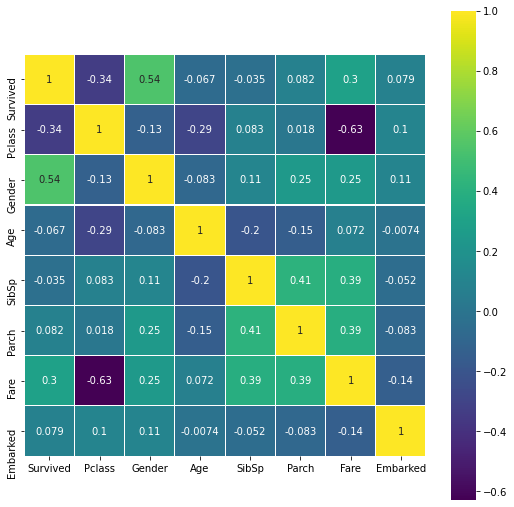

In [57]:
correlationMap = plt.cm.viridis
maxattr = len(list(traindata))
plt.figure(figsize = (maxattr+1,maxattr+1))
sns.heatmap(traindata.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = correlationMap, linecolor = 'white', annot=True)

In [58]:
def get_gini_impurity(survived,totalcount):
    unsurvived = totalcount -survived;
    survivedfac = survived / totalcount;
    unsurvivedfac = unsurvived / totalcount;
    giniindex = 1 -(survivedfac * survivedfac) - (unsurvivedfac* unsurvivedfac)
    return giniindex

In [59]:
uniquevalues = traindata["Gender"].unique()
totalcount = traindata["Gender"].count()
survivedtotaldf = traindata[(traindata.Survived == 1)]
beforesplitGiniindex = get_gini_impurity(survivedtotaldf["Gender"].count(),totalcount)
giniforeachunique = list()
for x in uniquevalues:
    totaldf = traindata[(traindata.Gender == x )]
    surviveddf = traindata[(traindata.Gender == x ) & (traindata.Survived == 1)]
    giniindex = get_gini_impurity(surviveddf["Gender"].count(),totaldf["Gender"].count())
    giniforeachunique.append(giniindex)
gain = beforesplitGiniindex  
gain

0.47301295786144276

In [60]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [61]:
X_test = testdata

In [62]:
X_test

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,1.0,0,0,0.0,3
1,3,1,2.0,1,0,0.0,0
2,2,0,3.0,0,0,1.0,3
3,3,0,1.0,0,0,1.0,0
4,3,1,1.0,1,1,1.0,0
...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,1.0,0
414,1,1,1.0,0,0,3.0,1
415,3,0,1.0,0,0,0.0,0
416,3,0,1.0,0,0,1.0,0


In [63]:
Y_train= traindata["Survived"]
X_train = traindata.drop(["Survived"], axis=1)


In [64]:
model = tree.DecisionTreeClassifier(max_depth = 8, criterion = 'gini',min_samples_split = 8,max_features = 'auto')
trainmodel = model.fit(X_train,Y_train)
textformat = tree.export_text(model)
print(textformat)

|--- feature_1 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_5 <= 1.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |--- feature_6 <= 2.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_6 >  2.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |

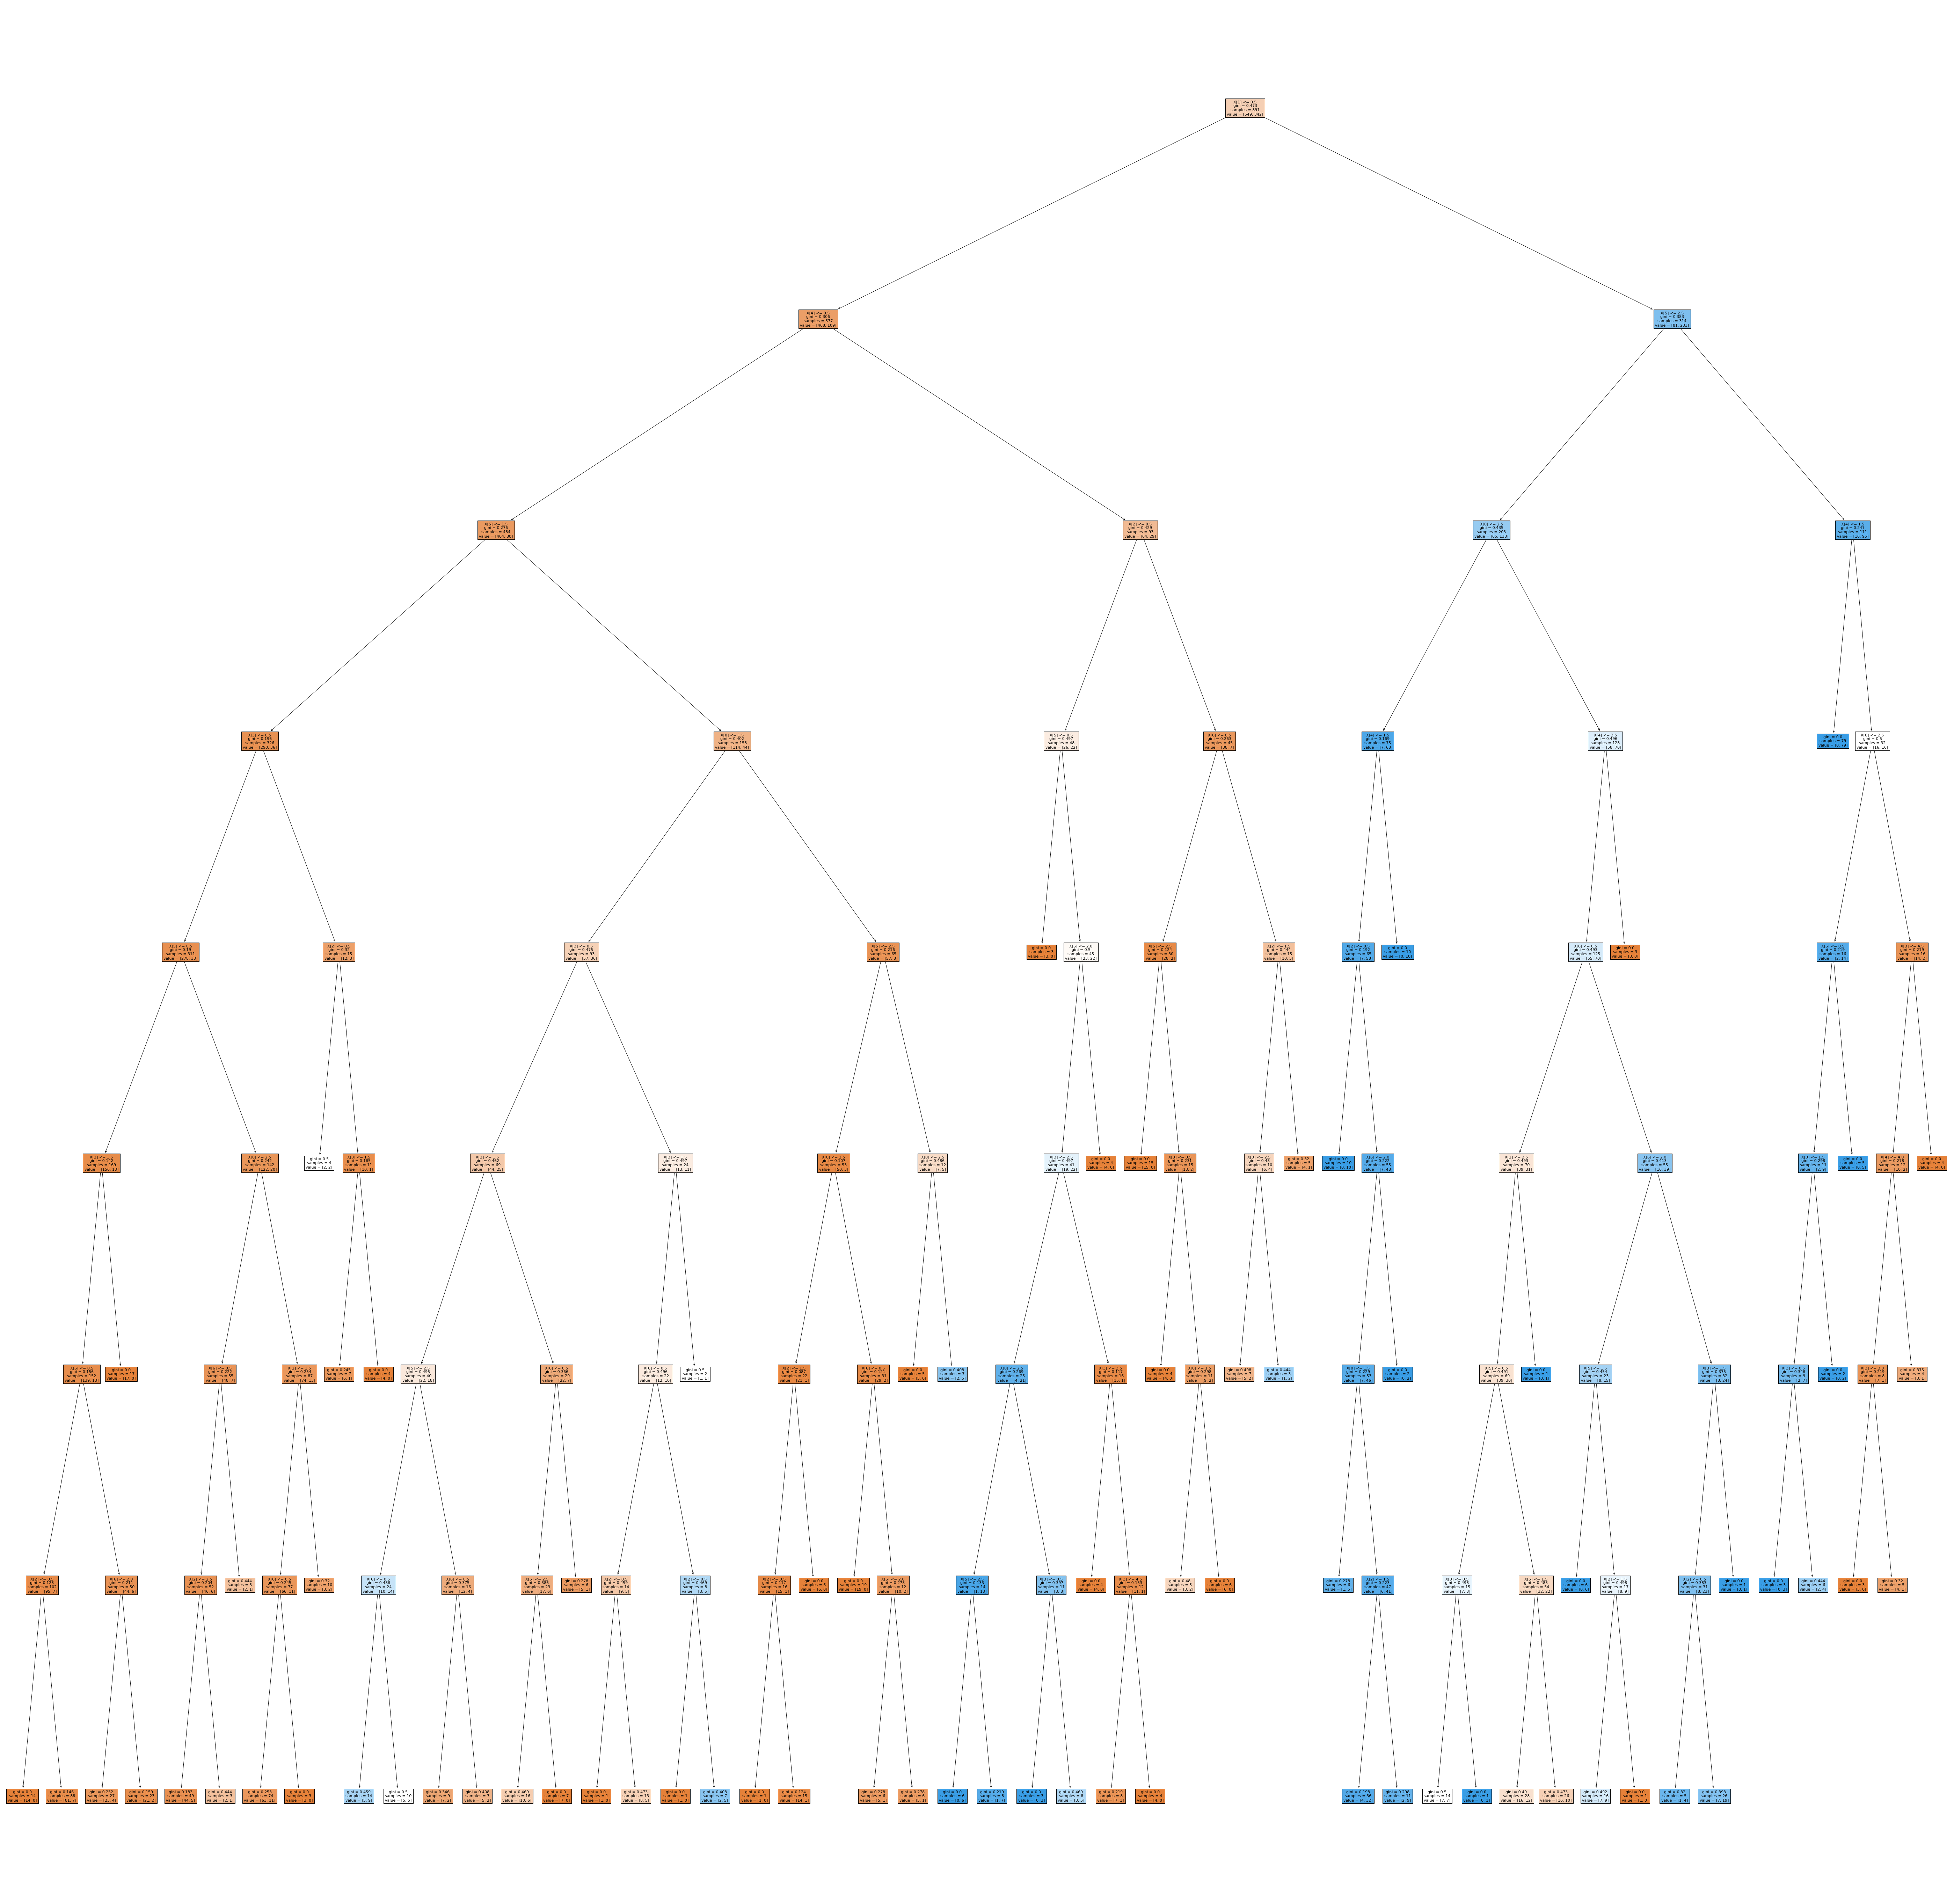

In [65]:
fig = plt.figure(figsize = (100,100))
_ = tree.plot_tree(model,filled = True)

In [66]:
cv = KFold(n_splits = 5)
max_attributes = len(list(traindata))
depth_range = range(1, max_attributes + 1)
accuracies = list()
for depth in depth_range:
    accuracy = []
    model = tree.DecisionTreeClassifier(max_depth = depth, criterion = 'gini',min_samples_split = max_attributes,max_features = 'auto')
    for trainset, foldset in cv.split(traindata):
        f_train = traindata.loc[trainset]
        f_valid = traindata.loc[foldset]
        trainnedmodel = model.fit(X = f_train.drop(["Survived"], axis=1),y = f_train["Survived"] )
        valid_acc = trainnedmodel.score(X = f_valid.drop(["Survived"], axis=1),y = f_valid["Survived"])
        accuracy.append(valid_acc)
    avg = (sum(accuracy)/len(accuracy)) * 100
    accuracies.append(avg)
df = pd.DataFrame({'depth':depth_range, 'accuracy':accuracies})
print(df)
    

   depth   accuracy
0      1  73.503860
1      2  68.563806
2      3  75.754818
3      4  76.326031
4      5  77.781684
5      6  77.222397
6      7  77.331618
7      8  75.990208


In [74]:
cv = KFold(n_splits = 5)
max_attributes = len(list(traindata))
depth_range = range(1, max_attributes + 1)
accuracies = list()

for depth in depth_range:
    accuracy = []
    model = RandomForestClassifier(n_estimators = 1000, max_depth = depth,criterion = 'gini',min_samples_split = 10,max_features = 'auto')
    for trainset, foldset in cv.split(traindata):
        f_train = traindata.loc[trainset]
        f_valid = traindata.loc[foldset]
        trainnedmodel = model.fit(X = f_train.drop(["Survived"], axis=1),y = f_train["Survived"] )
        valid_acc = trainnedmodel.score(X = f_valid.drop(["Survived"], axis=1),y = f_valid["Survived"])
        accuracy.append(valid_acc)
    avg = (sum(accuracy)/len(accuracy)) * 100
    accuracies.append(avg)
df = pd.DataFrame({'depth':depth_range, 'accuracy':accuracies})
print(df)

   depth   accuracy
0      1  75.198042
1      2  78.565062
2      3  80.021342
3      4  80.582512
4      5  81.369657
5      6  80.810997
6      7  80.474546
7      8  80.025108


In [68]:
Y_train= traindata["Survived"]

In [69]:
X_train = traindata.drop(["Survived"], axis=1)

In [70]:
X_train

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,0,1.0,1,0,0.0,0
1,1,1,1.0,1,0,3.0,1
2,3,1,1.0,0,0,1.0,0
3,1,1,1.0,1,0,3.0,0
4,3,0,1.0,0,0,1.0,0
...,...,...,...,...,...,...,...
886,2,0,1.0,0,0,1.0,0
887,1,1,0.0,0,0,2.0,0
888,3,1,1.0,1,2,2.0,0
889,1,0,1.0,0,0,2.0,1


In [71]:
model = tree.DecisionTreeClassifier(max_depth = 3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
"SVM model with linear kernel"

'SVM model with linear kernel'

In [84]:
cv = KFold(n_splits = 5)

kernel = np.array(['linear','rbf','poly'])
accuracies = list()

for kr in kernel:
    accuracy = []
    if (kr == 'poly'):
        model = svm.SVC( kernel = 'poly', degree = 2)
    else:
        model = svm.SVC( kernel = kr)
    for trainset, foldset in cv.split(traindata):
        f_train = traindata.loc[trainset]
        f_valid = traindata.loc[foldset]
        trainnedmodel = model.fit(X = f_train.drop(["Survived"], axis=1),y = f_train["Survived"] )
        valid_acc = trainnedmodel.score(X = f_valid.drop(["Survived"], axis=1),y = f_valid["Survived"])
        accuracy.append(valid_acc)
    avg = (sum(accuracy)/len(accuracy)) * 100
    accuracies.append(avg)
    
df = pd.DataFrame({'Kernel':kernel, 'accuracy':accuracies})
print(df)

   Kernel  accuracy
0  linear  78.67240
1     rbf  81.14431
2    poly  79.46080
